In [42]:
import numpy as np
import math
# from convexlocalisometry.loss import isometry_loss
import matplotlib.pyplot as plt

/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_98116/1539177424.py:5: RuntimeWarning: divide by zero encountered in reciprocal
  return (np.exp(t) + np.exp(t**(-1)))**(-1) * (2*math.e)
/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_98116/1539177424.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  return (np.exp(t) + np.exp(1/t) )/ (2 * math.e)
/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_98116/1539177424.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_98116/1539177424.py:30: RuntimeWarning: divide by zero encountered in reciprocal
  ax.plot(matrix_values, length_values**(-1), color = 'blue')
/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_98116/1539177424.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, w

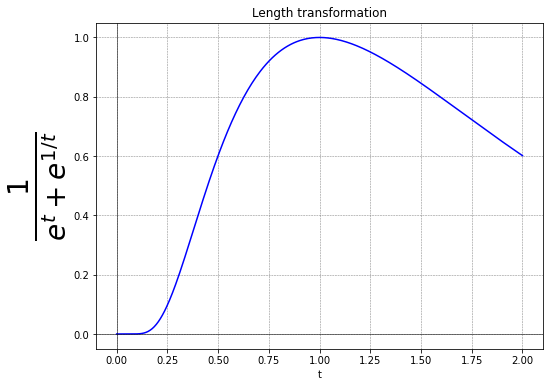

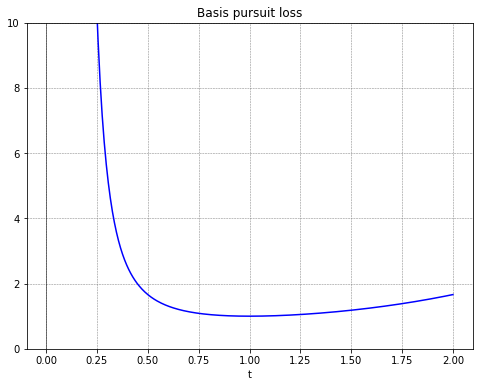

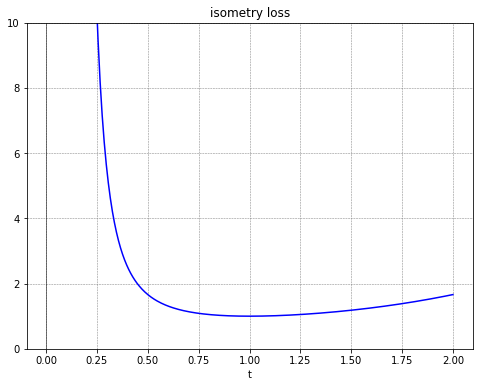

In [48]:
# at least, we want the isometry loss in 1 dimension to be equal to the rescaled basis pursuit loss

# This is the rescaled length... which is the inverse of the basis pursuit loss
def g(t):
    return (np.exp(t) + np.exp(t**(-1)))**(-1) * (2*math.e)

# Generate a range of t values
# matrix_values = np.linspace(0, 2, 400)
matrix_values = np.linspace(0, 2, 400)

length_values = g(matrix_values)

def isometry_loss(t):
    return (np.exp(t) + np.exp(1/t) )/ (2 * math.e)

loss_values_isometry = [isometry_loss(t) for t in matrix_values]

# Plot the function
fig, ax = plt.subplots(1,1,figsize=(8, 6))
ax.plot(matrix_values, length_values, color='blue')
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.set_title('Length transformation')
ax.set_ylabel(r'$\frac{1}{e^t + e^{1/t}}$', fontsize = 40) # log concave
ax.set_xlabel('t')
fig.show()

fig, ax = plt.subplots(1,1,figsize=(8, 6))
ax.plot(matrix_values, length_values**(-1), color = 'blue')
# ax.plot(t_values, loss_values_isometry, color='blue')
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.set_title('Basis pursuit loss')
ax.set_ylim(0,10)
ax.set_xlabel('t')
fig.show()

fig, ax = plt.subplots(1,1,figsize=(8, 6))
ax.plot(matrix_values, loss_values_isometry, color = 'blue')
# ax.plot(t_values, loss_values_isometry, color='blue')
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.set_title('isometry loss')
ax.set_ylim(0,10)
ax.set_xlabel('t')
fig.show()

In [27]:
# # lets try another isometry loss... not smooth
# def g(t):
#     return (np.exp(t) + np.exp(t**(-1)))**(-1) * (2*math.e)

# # Generate a range of t values
# matrix_values = np.linspace(0, 2, 400)
# length_values = g(matrix_values)

# def isometry_loss(t):
#     return np.exp(np.abs(np.log(t)))

# loss_values_isometry = [isometry_loss(t) for t in matrix_values]


# fig, ax = plt.subplots(1,1,figsize=(8, 6))
# ax.plot(matrix_values, loss_values_isometry, color = 'blue')
# # ax.plot(t_values, loss_values_isometry, color='blue')
# ax.axhline(0, color='black', linewidth=0.5)
# ax.axvline(0, color='black', linewidth=0.5)
# ax.grid(color='gray', linestyle='--', linewidth=0.5)
# ax.set_title('isometry loss')
# ax.set_ylim(0,10)
# ax.set_xlabel('t')
# fig.show()



/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_98116/1380706975.py:4: RuntimeWarning: divide by zero encountered in log
  return np.exp(np.log(t)**2)  # cont?  squared group lasso is not sparse
/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_98116/1380706975.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_98116/1380706975.py:19: RuntimeWarning: divide by zero encountered in log
  return  np.exp(np.log(t)**2)**(-1)
/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_98116/1380706975.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


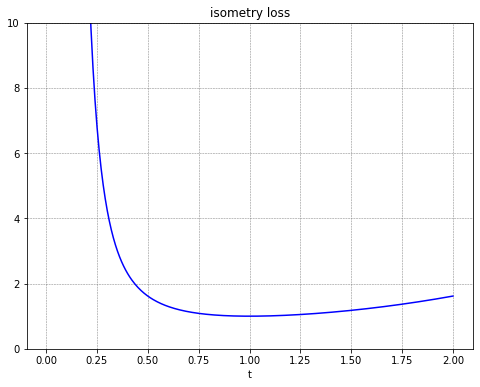

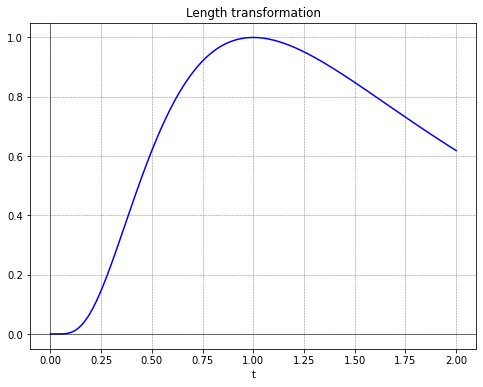

In [28]:
# lets try some other isometry loss
def new_isometry_loss(t):
#     return np.exp(np.linalg.norm(np.log(t)))  # discont
    return np.exp(np.log(t)**2)  # cont?  squared group lasso is not sparse
# is there a basis pursuit loss that corresponds to this?
# this would mean that the length was np.exp(np.log(t)**2)**(-1)

# We can use different losses here
new_loss_values_isometry = [new_isometry_loss(t) for t in matrix_values]
fig, ax = plt.subplots(1,1,figsize=(8, 6))
ax.plot(matrix_values, new_loss_values_isometry, color = 'blue')
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.set_title('isometry loss')
ax.set_ylim(0.,10.)
ax.set_xlabel('t')
fig.show()

def new_g(t):
    return  np.exp(np.log(t)**2)**(-1)

# Generate a range of t values
matrix_values = np.linspace(0, 2, 400)
new_length_values = new_g(matrix_values)


fig, ax = plt.subplots(1,1,figsize=(8, 6))
ax.plot(matrix_values, new_length_values, color='blue')
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.set_title('Length transformation')
ax.set_xlabel('t')
fig.show()


/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_98116/2537948890.py:10: RuntimeWarning: divide by zero encountered in log
  return np.exp(np.log(t)**2)  # cont?  squared group lasso is not sparse
/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_98116/1539177424.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  return (np.exp(t) + np.exp(1/t) )/ (2 * math.e)
/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_98116/2537948890.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


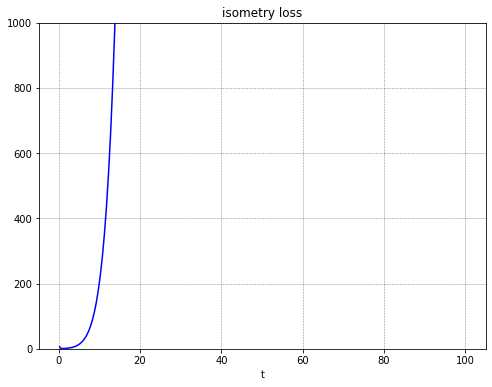

In [35]:
# the reason to use the loss sum exp is that it increases linearly and is continuous
# this one increase faster than linear
# and chatgpt says its not convex... now it says convex
# there are issues of stability with the squared one...

matrix_values = np.linspace(0, 100, 400)


def new_isometry_loss(t):
#     return np.exp(np.linalg.norm(np.log(t)))  # discont
    return np.exp(np.log(t)**2)  # cont?  squared group lasso is not sparse
    #np.log(t)**2 not convex
    
# is there a basis pursuit loss that corresponds to this?
# this would mean that the length was np.exp(np.log(t)**2)**(-1)

new_loss_values_isometry = [new_isometry_loss(t) for t in matrix_values]
loss_values_isometry = [isometry_loss(t) for t in matrix_values]
fig, ax = plt.subplots(1,1,figsize=(8, 6))
ax.plot(matrix_values, new_loss_values_isometry, color = 'blue')
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.set_title('isometry loss')
ax.set_ylim(0.,1000.)
ax.set_xlabel('t')
fig.show()



# def new_g(t):
#     return  np.exp(np.log(t)**2)**(-1)

# # Generate a range of t values
# matrix_values = np.linspace(0, 200, 400)
# new_length_values = new_g(matrix_values)


# fig, ax = plt.subplots(1,1,figsize=(8, 6))
# ax.plot(matrix_values, length_values, color='blue')
# ax.axhline(0, color='black', linewidth=0.5)
# ax.axvline(0, color='black', linewidth=0.5)
# ax.grid(color='gray', linestyle='--', linewidth=0.5)
# ax.set_title('Length transformation')
# ax.set_ylabel(r'$\frac{1}{e^t + e^{1/t}}$', fontsize = 40) # log concave
# ax.set_xlabel('t')
# fig.show()


/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_98116/2206589884.py:11: RuntimeWarning: divide by zero encountered in log
  return np.log(t)**2  # cont?  squared group lasso is not sparse
/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_98116/1539177424.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  return (np.exp(t) + np.exp(1/t) )/ (2 * math.e)
/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_98116/2206589884.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


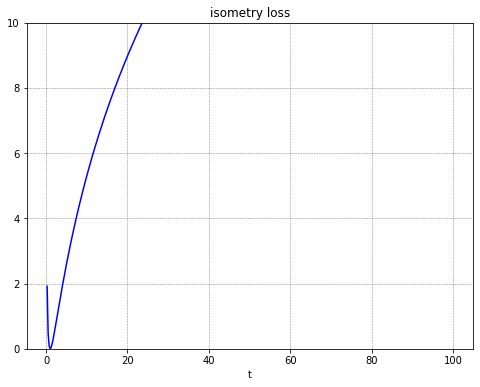

In [40]:
# the reason to use the loss sum exp is that it increases linearly and is continuous
# this one increase faster than linear
# and chatgpt says its not convex... now it says convex
# there are issues of stability with the squared one...

matrix_values = np.linspace(0, 100, 400)


def new_isometry_loss(t):
#     return np.exp(np.linalg.norm(np.log(t)))  # discont
    return np.log(t)**2  # cont?  squared group lasso is not sparse
# is there a basis pursuit loss that corresponds to this?
# this would mean that the length was np.exp(np.log(t)**2)**(-1)

new_loss_values_isometry = [new_isometry_loss(t) for t in matrix_values]
loss_values_isometry = [isometry_loss(t) for t in matrix_values]
fig, ax = plt.subplots(1,1,figsize=(8, 6))
ax.plot(matrix_values, new_loss_values_isometry, color = 'blue')
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.set_title('isometry loss')
ax.set_ylim(0.,10.)
ax.set_xlabel('t')
fig.show()



# def new_g(t):
#     return  np.exp(np.log(t)**2)**(-1)

# # Generate a range of t values
# matrix_values = np.linspace(0, 200, 400)
# new_length_values = new_g(matrix_values)


# fig, ax = plt.subplots(1,1,figsize=(8, 6))
# ax.plot(matrix_values, length_values, color='blue')
# ax.axhline(0, color='black', linewidth=0.5)
# ax.axvline(0, color='black', linewidth=0.5)
# ax.grid(color='gray', linestyle='--', linewidth=0.5)
# ax.set_title('Length transformation')
# ax.set_ylabel(r'$\frac{1}{e^t + e^{1/t}}$', fontsize = 40) # log concave
# ax.set_xlabel('t')
# fig.show()


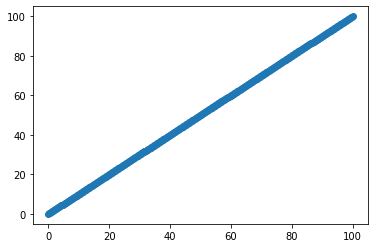

In [38]:
plt.scatter(np.abs(matrix_values), snoot)

In [37]:
snoot = [np.linalg.norm(mv) for mv in matrix_values]

(0.0, 10.0)

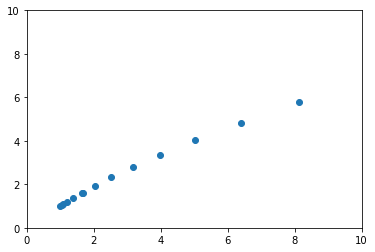

In [36]:
plt.scatter(loss_values_isometry,new_loss_values_isometry)
plt.xlim(0,10)
plt.ylim(0,10)

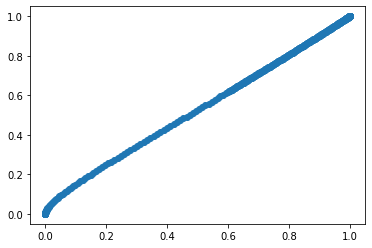

In [30]:
plt.scatter(length_values,new_length_values)

(0.0, 10.0)

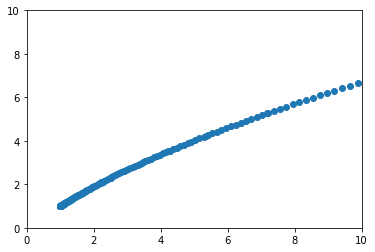

In [6]:
isometry_loss(matrix_values[1])

4.3827746366474943e+86

In [7]:
len(isometry_loss)

TypeError: object of type 'function' has no len()

In [42]:
length_values**(-1)

/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_95701/278171564.py:1: RuntimeWarning: divide by zero encountered in reciprocal
  length_values**(-1)


array([           inf, 8.06166342e+85, 3.85079228e+42, 1.39719997e+28,
       8.41613721e+20, 3.91764744e+16, 5.06952239e+13, 4.38599626e+11,
       1.24421137e+10, 7.78998350e+08, 8.48888084e+07, 1.38419787e+07,
       3.05366444e+06, 8.50012978e+05, 2.84035217e+05, 1.09848193e+05,
       4.78395023e+04, 2.29748554e+04, 1.19705287e+04, 6.68006573e+03,
       3.95171237e+03, 2.45758878e+03, 1.59585248e+03, 1.07594834e+03,
       7.49667358e+02, 5.37667680e+02, 3.95622131e+02, 2.97808039e+02,
       2.28784012e+02, 1.78994000e+02, 1.42359521e+02, 1.14916774e+02,
       9.40218480e+01, 7.78744674e+01, 6.52254375e+01, 5.51927998e+01,
       4.71438560e+01, 4.06179855e+01, 3.52752412e+01, 3.08615419e+01,
       2.71847376e+01, 2.40979127e+01, 2.14875829e+01, 1.92652446e+01,
       1.73612552e+01, 1.57203501e+01, 1.42983265e+01, 1.30595648e+01,
       1.19751598e+01, 1.10214991e+01, 1.01791726e+01, 9.43212966e+00,
       8.76702300e+00, 8.17269377e+00, 7.63976548e+00, 7.16032119e+00,
      

/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_95701/600862215.py:10: RuntimeWarning: divide by zero encountered in reciprocal
  return -np.log(np.exp(t) + np.exp(t**(-1)))
No handles with labels found to put in legend.


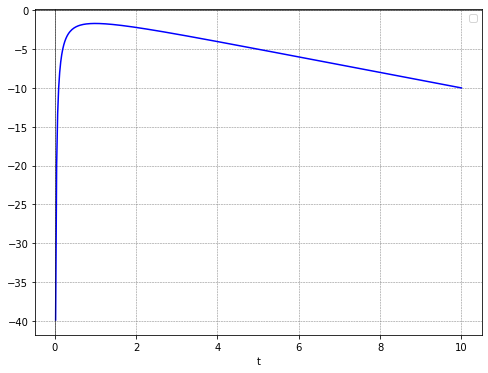

In [9]:
# here we have it stretching out from the matrix [[2]]
# this is still a great function with a special type of symmetry
# the "log" singular value function is going to be very hard to make convex
# can we use concave?
import numpy as np
import matplotlib.pyplot as plt

# Define the function g(t) = |log|2 + t||
def g(t):
    return -np.log(np.exp(t) + np.exp(t**(-1)))

# Generate a range of t values
t_values = np.linspace(0, 10, 400)
g_values = g(t_values)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(t_values, g_values, color='blue')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.xlabel('t')

plt.legend()
plt.show()


/var/folders/5j/2xkgvzfs29nfprr5czfm2gtr0000gn/T/ipykernel_95701/44515142.py:10: RuntimeWarning: divide by zero encountered in reciprocal
  return np.exp(-np.log(np.exp(t) + np.exp(t**(-1))))
No handles with labels found to put in legend.


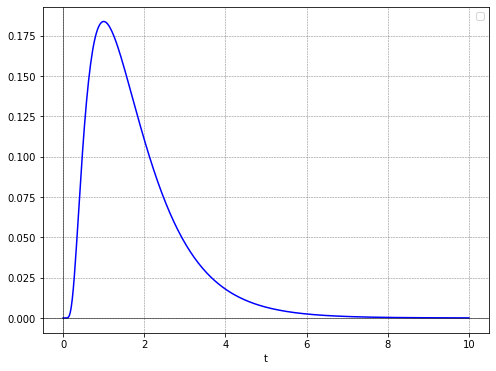

In [14]:
# here we have it stretching out from the matrix [[2]]
# this is still a great function with a special type of symmetry
# the "log" singular value function is going to be very hard to make convex
# can we use concave?
import numpy as np
import matplotlib.pyplot as plt

# Define the function g(t) = |log|2 + t||
def g(t):
    return np.exp(-np.log(np.exp(t) + np.exp(t**(-1))))

# Generate a range of t values
t_values = np.linspace(0, 10, 400)
g_values = g(t_values)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(t_values, g_values, color='blue')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.xlabel('t')

plt.legend()
plt.show()
